In [7]:
import numpy as np
import pandas as pdi
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('D:\SEM 4\Supervised Machine Learning Lab\\Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
del df['Unnamed: 0']

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Sales=β0+(β1*TV)+(β1*Radio)+(β1*News)+e

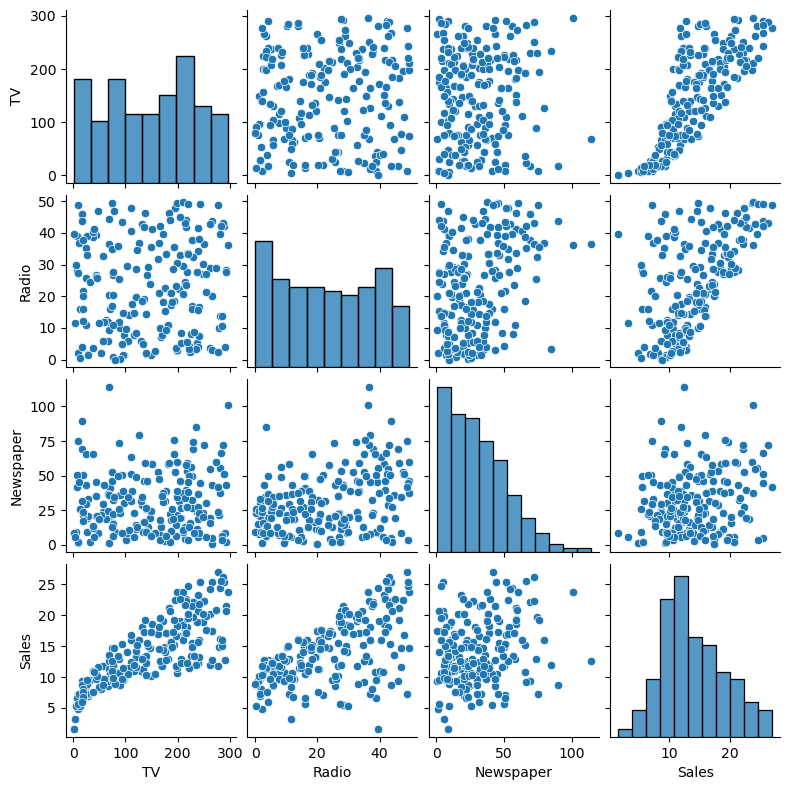

In [8]:
sns.pairplot(data=df,height=2)

- TV with sales there is a linear relationship
- Radio with sales is slightly distributed
- News with sales is completely distributed

- Hence TV is the best feature

### Check for Multicollinearity

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
def calc_vif(X):
    vif=pd.DataFrame()
    vif['Variance']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    
    return vif

In [16]:
X=df.iloc[:,:-1]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
calc_vif(X)

,Variance,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


- We only drop the feature if the VIF value is greater than 5

In [20]:
X=df.iloc[:,0:3]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [25]:
y=df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred=lr.predict(X_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("The MSE value is: ",mse)
print("The RMSE value is:",rmse)

The MSE value is:  3.1740973539761046
The RMSE value is: 1.7815996615334502


In [50]:
r2=r2_score(y_test,y_pred)
print("The R2 score is:",r2)

The R2 score is: 0.899438024100912


In [51]:
a=lr.coef_
b=lr.intercept_,

In [52]:
print("The estimated model Slope is ",a)
print("The estiamted model intercept is ",b)

The estimated model Slope is  [0.04472952 0.18919505 0.00276111]
The estiamted model intercept is  (2.9790673381226274,)


In [57]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# error because not catagorical

In [59]:
mlr_diff=pd.DataFrame({'Actaul value':y_test,'Predicted value':y_pred})
mlr_diff.head(10)

,Actaul value,Predicted value
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
115,12.6,13.105592
69,22.3,21.057192
170,8.4,7.461010
174,11.5,13.606346
45,14.9,15.155070
